# Run the whole deltas algorithm

In [365]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [366]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[20, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

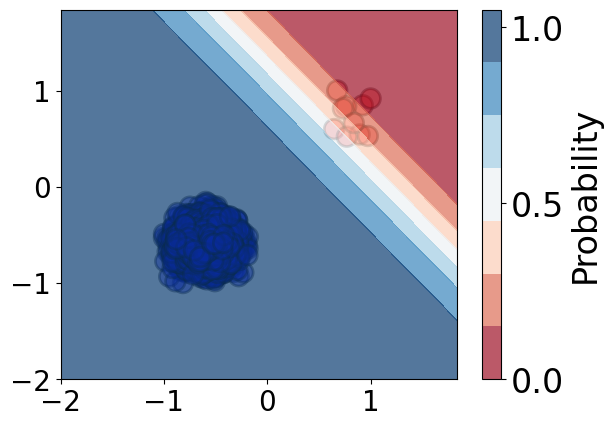

In [367]:
model = 'SVM'
model = 'Linear'
# model = 'MLP'
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [368]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.41275503]])

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.4905072105482894
R2 empirical: 0.2596884842817164


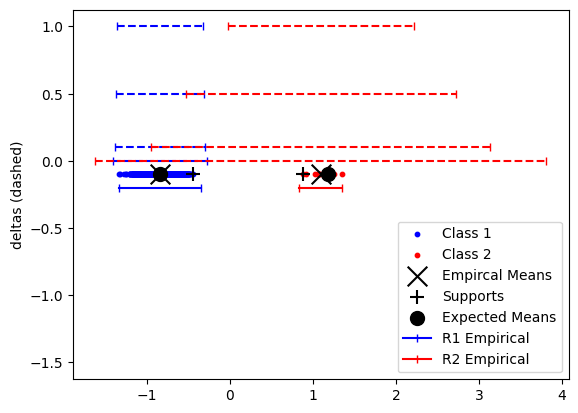

In [369]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [370]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline.print_params(data_info)

Parameters
        R:  1.3568285731787963
        N1: 10000
        N2: 10000
        R1: 0.4905072105482894
        R2: 0.2596884842817164
        M:  1.3295770419879485
        D:  1.9365859209643221
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.7817166761300838]
eq. 7 can be satisfied: True
constraint init: False
Grid Search Optimisation Complete
    delta1 : 0.004004004004005 
    delta2: 0.8369081168708122
    constraint satisfied: True


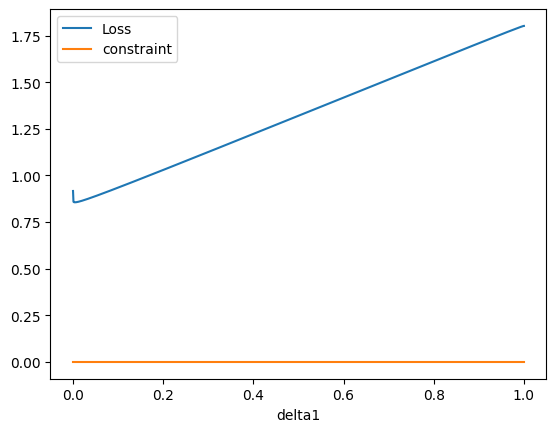

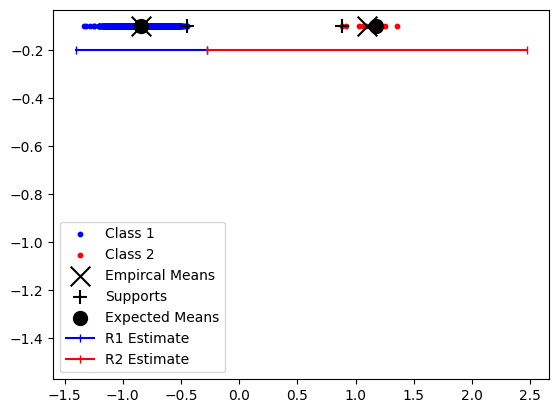

In [371]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
# loss_func only - won't use gradient during optimisation
loss_func = deltas.loss_one_delta

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt

delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

original accuracy: 0.985
deltas   accuracy: 1.0


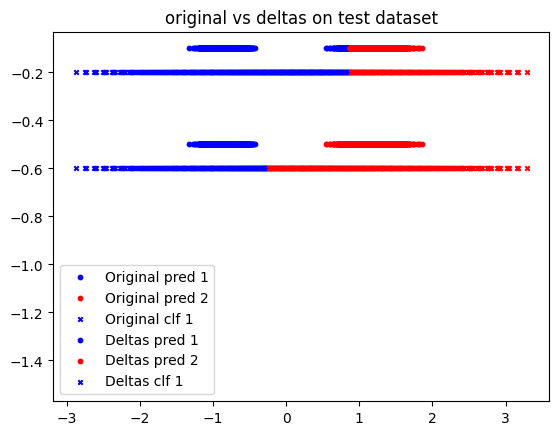

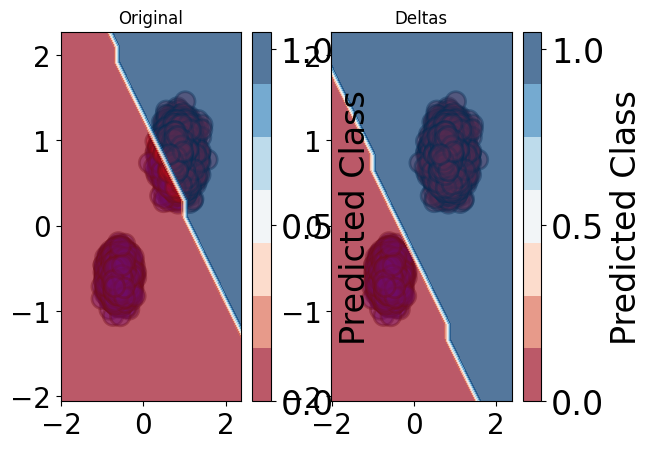

In [372]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)